In [1]:
from initialization.calculate_w import calculate_w
from initialization.construct_A import construct_A_matrix

**MAX-XORSAT Equation:**

$$
\text{maximize } 4 - \left[ (x_2 \oplus 0) + ((x_1 \oplus x_2) \oplus 1) + (x_3 \oplus 1) + ((x_1 \oplus x_3) \oplus 0) \right].
$$

**Expanded Form:**

$$
\text{maximize } \sum_{i=1}^4 \left( 1 - (\text{Constraint}_i \oplus v_i) \right),
$$

where:

$$
\text{Constraint}_1 = x_2, \quad
\text{Constraint}_2 = x_1 \oplus x_2, \quad
\text{Constraint}_3 = x_3, \quad
\text{Constraint}_4 = x_1 \oplus x_3,
$$

and:

$$
v = \begin{bmatrix} 0 \\ 1 \\ 1 \\ 0 \end{bmatrix}.
$$


In [32]:
import numpy as np
B = np.array([
    [0, 1, 0],
    [1, 1, 0],
    [0, 0, 1],
    [1, 0, 1]
])
v = np.array([
    [0],
    [1],
    [1],
    [0]
])
print("B:\n", B)
print("\nv:\n", v)

B:
 [[0 1 0]
 [1 1 0]
 [0 0 1]
 [1 0 1]]

v:
 [[0]
 [1]
 [1]
 [0]]


In [52]:
x = np.array([
    [1, 0, 1],
])

print(len(B) - sum((B@x.T + v) % 2)[0])

4


In [54]:
m, p, r, ell = len(B[0]), 2, 1, 3

# Sparse matrix
A, _ = construct_A_matrix(m, ell, p, r)
w, _ = calculate_w(A)
w

array([-0.35355339, -0.61237244, -0.61237244, -0.35355339])

In [55]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

initialize_circuit = QuantumCircuit(ell-1)

In [56]:
initialize_circuit.initialize(w)

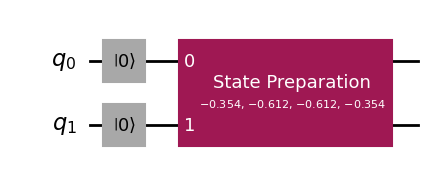

In [57]:
initialize_circuit.decompose().draw('mpl')

In [58]:
from dicke_state_preparation.gates import DickeStatePreparation
from utils import binary_combinations

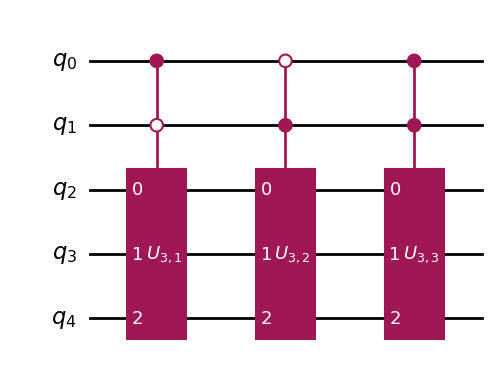

In [59]:
dicke_circuit = QuantumCircuit(ell-1+m)
ctrl_states = binary_combinations(ell-1)
for k in range(1, 2**(ell-1)):
    dicke_circuit.append(DickeStatePreparation(m, k).to_gate().control(ell-1, ctrl_state=ctrl_states[k]), range(ell-1+m))
dicke_circuit.draw('mpl')

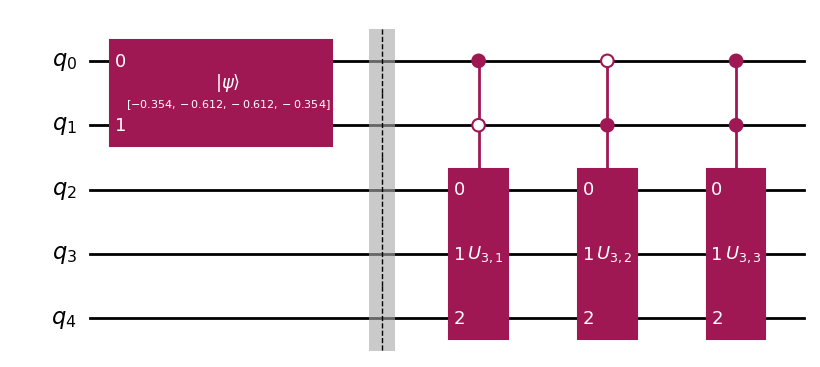

In [60]:
combine_circuit_1 = QuantumCircuit(ell-1+m)
combine_circuit_1.compose(initialize_circuit, inplace=True)
combine_circuit_1.barrier()
combine_circuit_1.compose(dicke_circuit, inplace=True)
combine_circuit_1.draw('mpl')

In [61]:
from qiskit.quantum_info import Statevector
Statevector(combine_circuit_1).draw('latex')

<IPython.core.display.Latex object>

In [62]:
B

array([[0, 1, 0],
       [1, 1, 0],
       [0, 0, 1],
       [1, 0, 1]])